In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=False)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
def cm2inch(value):
    return value/2.54

In [17]:
NacL = np.array([0.139e-3, 37.685e-6, 16.3e-6, 8.9e-6 ])

In [18]:
nacl = (0.304 / 26)**2

In [19]:
nacl

0.00013671005917159765

In [20]:
0.304 / np.sqrt(0.1e-3)

30.4

In [21]:
lb_th = 0.304 / np.sqrt(NacL)

In [22]:
ld_exp = [25.1, 50.0, 75.1, 100.0]
B_exp = [4.4,4.1,4.0,4.1]


In [23]:
np.mean(B_exp)


4.15

In [24]:
np.std(B_exp)


0.15000000000000022

Text(0, 0.5, '$l_\\mathrm{B}$ (nm)')

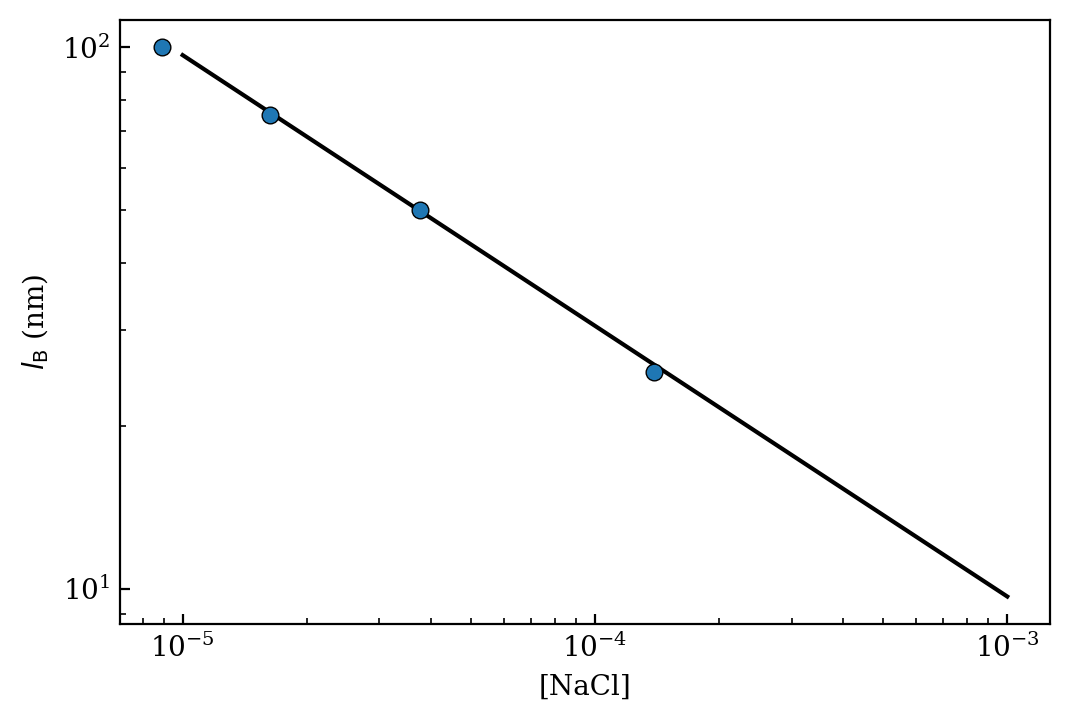

In [25]:
nacl_th = np.linspace(10e-6,1e-3, 10000)
lb_th = 0.306/np.sqrt(nacl_th)
plt.loglog(nacl_th,lb_th, "k")
plt.plot(NacL, ld_exp, "o")
plt.xlabel("[NaCl]")
plt.ylabel("$l_\mathrm{B}$ (nm)")

In [26]:
0.306/np.sqrt(nacl_th)

array([96.7656964 , 96.29018642, 95.82161825, ...,  9.67752786,
        9.67704871,  9.67656964])

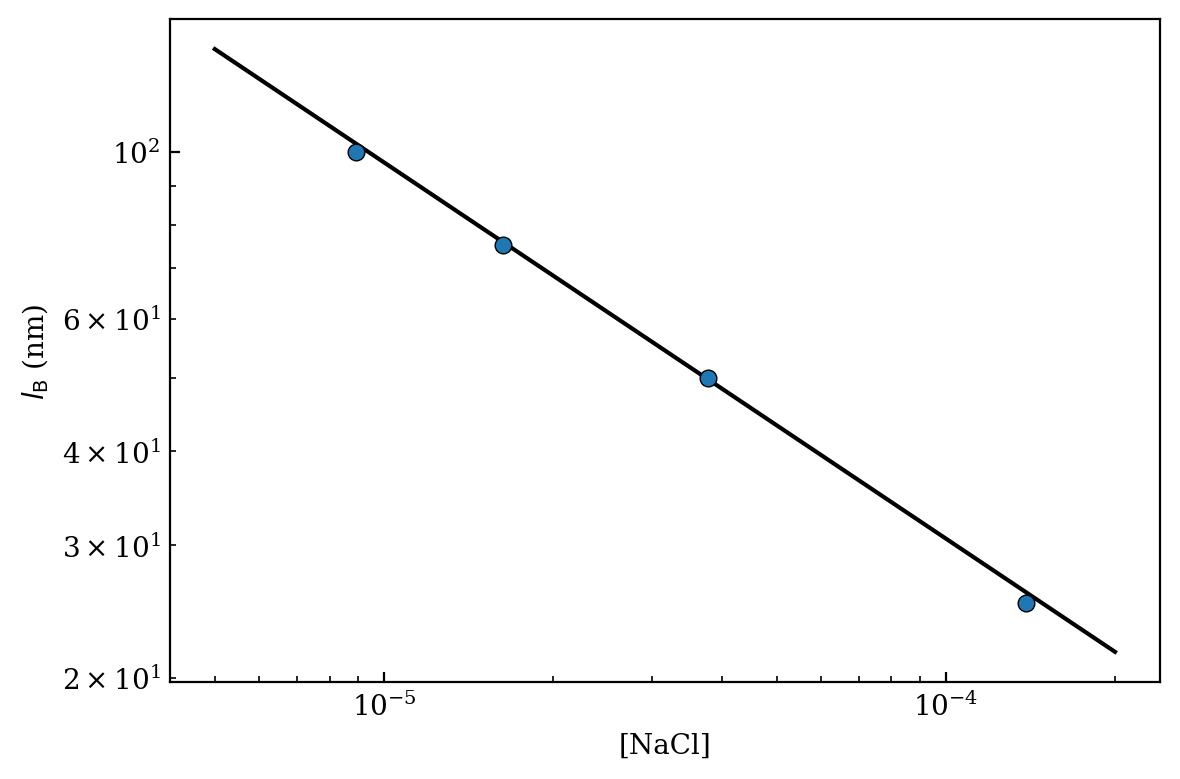

In [27]:
fig = plt.figure()
nacl_th = np.linspace(5e-6,0.2e-3, 100)
lb_th = 0.306/np.sqrt(nacl_th)
plt.loglog(nacl_th,lb_th, color = "k")
#plt.plot(NacL, lb_exp, "o")
plt.errorbar(NacL, ld_exp, yerr = 0.5, capsize = 0.5, fmt = "o", capthick = 1.5, ecolor = "k")


plt.xlabel("[NaCl]")
plt.ylabel("$l_\mathrm{B}$ (nm)")
plt.tight_layout()
plt.savefig("rep.png")

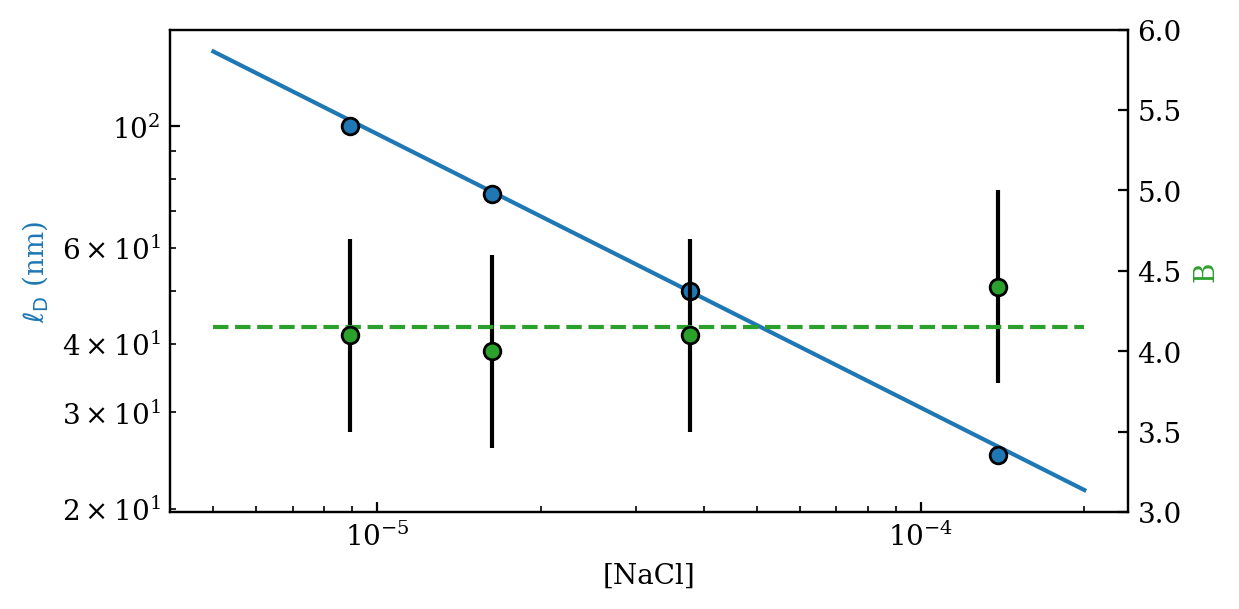

In [43]:
plt.figure(figsize=( cm2inch(16),cm2inch(8)))
ax = plt.gca()
nacl_th = np.linspace(5e-6,0.2e-3, 100)
lb_th = 0.306/np.sqrt(nacl_th)
plt.semilogy(nacl_th,lb_th, color = "tab:blue")
plt.errorbar(NacL, ld_exp, yerr = 0.1, capsize = 0.5, fmt = "o", capthick = 2, ecolor = "k")

plt.xlabel("[NaCl]")
plt.ylabel("$\ell_\mathrm{D}$ (nm)", color = "tab:blue")

ax2=ax.twinx()
plt.errorbar(NacL, B_exp,yerr=0.6, fmt="o", color = "tab:green", capthick = 10, ecolor = "k")
plt.semilogx()
plt.plot(nacl_th, np.ones(100)*np.mean(B_exp), "--", color = "tab:green")
plt.ylim((3,6))
plt.ylabel("B", color = "tab:green")

plt.tight_layout()
plt.savefig("ld.pdf")

In [29]:
def B_th(nacl, Psi_s, Psi_p):
    Psi_s = -np.abs(Psi_s)
    Psi_p = -np.abs(Psi_p)
    ld = 0.304/np.sqrt(nacl)
    k = 1/(ld*1e-9)
    a = 1.5e-6
    e = 1.6e-19
    cont1 = 4*np.pi*78.5*8.12*1e-12*a/(e**2) * 4e-21
    gamma = np.tanh(Psi_s / 4)
    omega = (Psi_p - 4*gamma) / (2*gamma**3)
    
    B = [cont1 * (Psi_s + 4*gamma*omega*i*a)/(1 + omega*i*a) * (4 * np.tanh(Psi_s/4)) for i in k]
    B = np.array(B)
    return B

    

<ErrorbarContainer object of 3 artists>

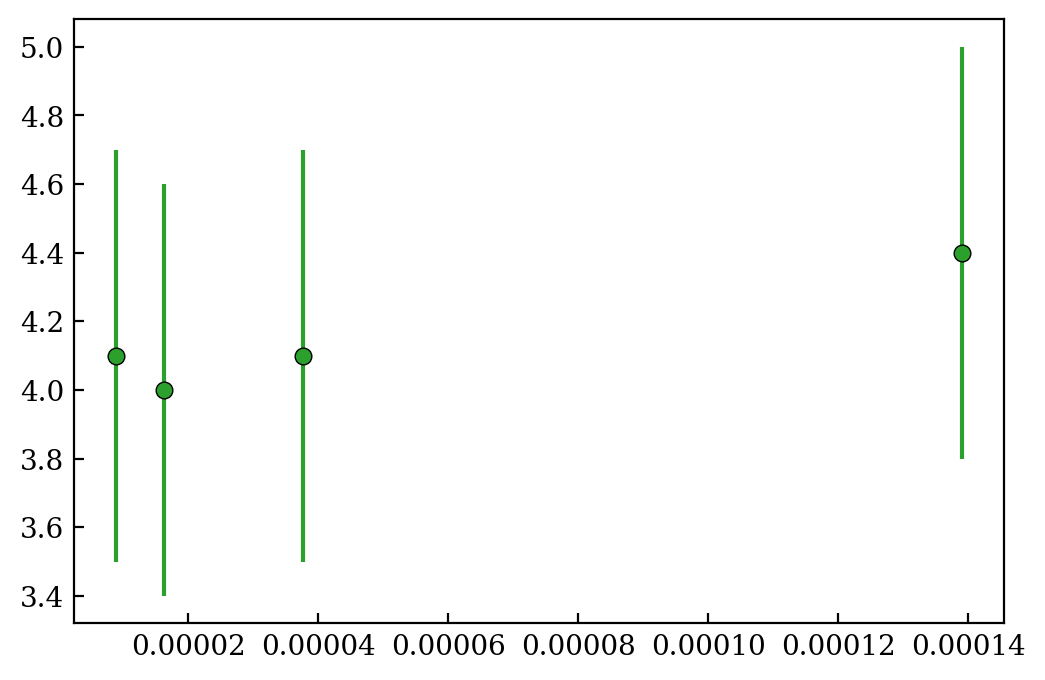

In [30]:
ld = np.linspace(0.5e-5,1,1)
plt.errorbar(NacL, B_exp,yerr=0.6, fmt="o", color = "tab:green")


In [31]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(B_th, NacL[1:], np.array(B_exp[1:])*4e-21, p0=[0.5, 10])

C:\Users\maxim\miniconda3\envs\holopy\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [32]:
plt.errorbar(NacL, np.array(B_exp)*,yerr=0.6*4e-21, fmt="o", color = "tab:green", label = "exp")
plt.semilogx(NacL, B_th(NacL, *popt), color = "k", label = "th")
plt.xlabel("[NaCl]")
plt.ylabel("B")

SyntaxError: invalid syntax (<ipython-input-32-19a4a7ff1329>, line 1)

In [33]:
popt # * 4e-21 / 1.6e-19

array([ 3.29782780e-12, -2.64277402e+05])

In [26]:
3.35418656e+02/(4*np.pi*(1.5**2))

11.863008246142227

In [27]:
1.5e-6 / 100e-9

15.000000000000002